# Librerias

In [2507]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from  colorama  import  Fore
import os


# Dataset

## Leer conjunto de datos y primer vistazo

In [2508]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
df_raw = pd.read_csv('../data/train.csv')
df_raw.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2509]:
df_raw.shape

(8693, 14)

## Exploración de datos

In [2510]:
# Descripción del conjunto de datos, estándard.
print(f"\n{Fore.CYAN}Número de filas y columnas:\n{Fore.RESET}")
print(df_raw.shape)  # Muestra (n_filas, n_columnas)
print(f"\n{Fore.CYAN}Informacion del dataset:\n{Fore.RESET}")
print(df_raw.info())
print(f"\n{Fore.CYAN}Columnas del dataset:\n{Fore.RESET}")
print(df_raw.columns)  # Lista las columnas del dataset



Número de filas y columnas:

(8693, 14)

Informacion del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

Columnas del dataset:

Index(['PassengerId', 'HomePlanet', 'CryoSlee

#### Calcular el número de nulos de cada feature

In [2511]:
# Contar los nulos por variable.
print(f"\n{Fore.CYAN}Valores nulos por columna:\n{Fore.RESET}")
df_raw.isnull().sum()  # Suma los valores nulos por columna


Valores nulos por columna:



PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Correlacionar la columna Cabin con VIP puede ser útil para imputar valores nulos

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [2512]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

unique_values_df = pd.DataFrame({
    'features': df_raw.columns,
    'n_values': [df_raw[col].nunique() for col in df_raw.columns]
})

print(f"\n{Fore.CYAN}Valores únicos por columna:\n{Fore.RESET}")
print(unique_values_df)



Valores únicos por columna:

        features  n_values
0    PassengerId      8693
1     HomePlanet         3
2      CryoSleep         2
3          Cabin      6560
4    Destination         3
5            Age        80
6            VIP         2
7    RoomService      1273
8      FoodCourt      1507
9   ShoppingMall      1115
10           Spa      1327
11        VRDeck      1306
12          Name      8473
13   Transported         2


In [2513]:
# Muestra el número total de duplicados 
print(f"\n{Fore.CYAN}Número total de duplicados:\n{Fore.RESET}")
print(df_raw.duplicated().sum())


Número total de duplicados:

0


In [2514]:
# Información estadística inicial
print(f"\n{Fore.CYAN}Información estadística inicial:\n{Fore.RESET}")
df_raw.describe() 


Información estadística inicial:



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [2515]:
#funcion para mostrar gráficos

def save_and_clear_plot(file_name, output_folder="eda_plots"):
    """
    Saves the current plot to a specified folder and then clears the figure.

    Parameters:
    file_name (str): The name of the image file to save (with extension).
    output_folder (str): The folder where the image will be saved (default is "eda_plots").
    """
    # Create the folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Build the full file path
    output_path = os.path.join(output_folder, file_name)

    # Save the current plot to the specified path
    plt.savefig(output_path)

    # Show the plot (optional)
    plt.show()

    # Clear the current figure to avoid overlapping plots
    plt.clf()


## Nulos

In [2516]:
#Reemplazo de Valores Vacíos por NaN
df_modified = df_raw.replace("", np.nan)

In [2517]:
def contar_interrogacion_en_columnas(df):   
    # Iterar sobre todas las columnas del DataFrame
    for column in df.columns:
        if df[column].dtype == 'object':  # Solo para columnas de tipo 'object' (categóricas)
            # Contar cuántas veces aparece '?' en la columna
            count = (df[column] == '?').sum()
            print(f"Columna '{column}' tiene {count} filas con '?'")
            if count == 0:
                print(f"{Fore.CYAN}No se realiza ninguna accion\n{Fore.RESET}")
            else:
                df_modified = df_modified.replace("?", np.nan)


# Aplicar la función al DataFrame
print(f"\n{Fore.CYAN}Contar cuántas veces aparece '?':\n{Fore.RESET}")
contar_interrogacion_en_columnas(df_modified)




Contar cuántas veces aparece '?':

Columna 'PassengerId' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'HomePlanet' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'CryoSleep' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'Cabin' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'Destination' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'VIP' tiene 0 filas con '?'
No se realiza ninguna accion

Columna 'Name' tiene 0 filas con '?'
No se realiza ninguna accion



In [2518]:
columns = df_modified.columns
n_values = [df_modified[a].unique() for a in df_modified.columns]

cuenta = pd.DataFrame()
cuenta['features'] = columns
cuenta['n_values'] = n_values
cuenta

,features,n_values
0,PassengerId,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ..."
1,HomePlanet,"[Europa, Earth, Mars, nan]"
2,CryoSleep,"[False, True, nan]"
3,Cabin,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0..."
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]"
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28...."
6,VIP,"[False, True, nan]"
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71..."
8,FoodCourt,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0..."
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589...."


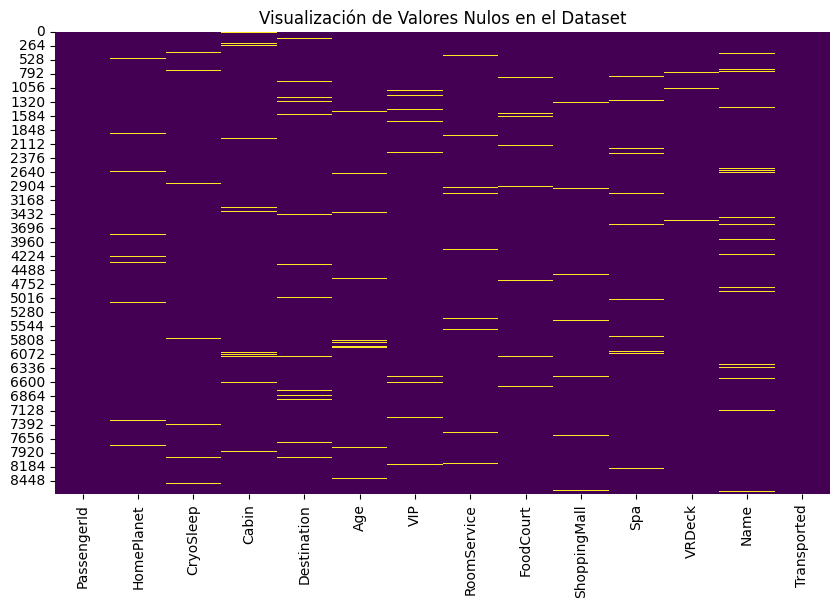

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2519]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un heatmap para mostrar los valores nulos
sns.heatmap(df_modified.isnull(), cbar=False, cmap='viridis')

# Título del gráfico
plt.title('Visualización de Valores Nulos en el Dataset')

# Mostrar el gráfico
plt.show()


# Guardar el heatmap y limpiar la figura
save_and_clear_plot("heatmap_valores_nulos.png")

## Gráficos

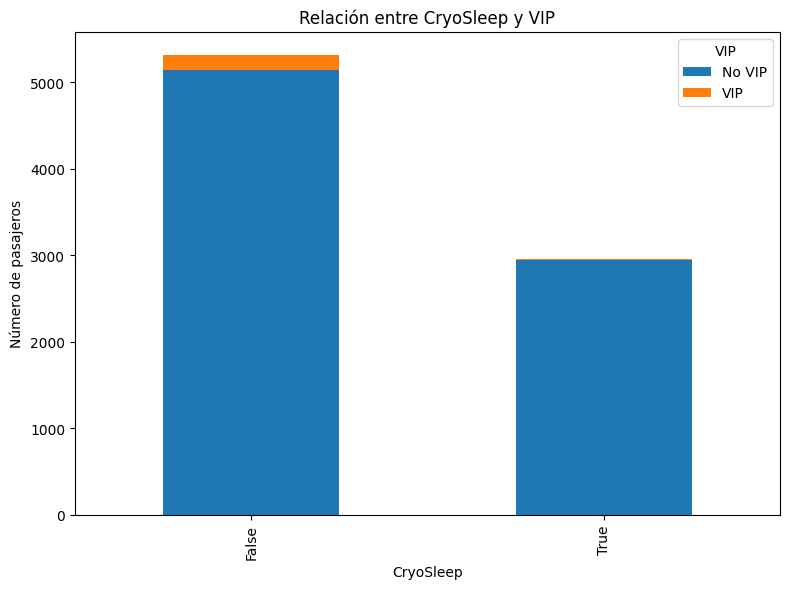

In [2520]:
# Crear una tabla de contingencia para contar las combinaciones de CryoSleep y VIP
cryo_vip_table = pd.crosstab(df_modified['CryoSleep'], df_modified['VIP'])

# Crear un gráfico de barras apiladas para visualizar la relación entre CryoSleep y VIP
cryo_vip_table.plot(kind='bar', stacked=True, figsize=(8, 6))

# Etiquetas y título
plt.title('Relación entre CryoSleep y VIP')
plt.xlabel('CryoSleep')
plt.ylabel('Número de pasajeros')
plt.legend(title='VIP', labels=['No VIP', 'VIP'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El gráfico sugiere que, en este conjunto de datos, el estado de criosueño no está asociado de manera notable con el hecho de ser VIP, dado que el porcentaje de pasajeros VIP en ambos grupos es muy bajo, luego, no podemos imputar los 6 restantes basandonos en si estan en criosueño o no.

### Imputación

## Buscar outliers

In [2521]:
def numeric_column_outliers(column: str):
    # Calcular Q1 (25%) y Q3 (75%)
    Q1 = df_modified[column].quantile(0.25)
    Q3 = df_modified[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = df_modified[(df_modified[column] < lower_bound) | 
                           (df_modified[column] > upper_bound)]
    return outliers.shape[0]

# Filtrar columnas numéricas
numeric_columns = df_raw.select_dtypes(include=['float64', 'int64']).columns

# Aplicar la función a las columnas numéricas
for column in numeric_columns:
    print(f"\n{Fore.LIGHTCYAN_EX}Número de outliers en {column}:{Fore.RESET}\n\n{numeric_column_outliers(column)}")




Número de outliers en Age:

77

Número de outliers en RoomService:

1861

Número de outliers en FoodCourt:

1823

Número de outliers en ShoppingMall:

1829

Número de outliers en Spa:

1788

Número de outliers en VRDeck:

1809


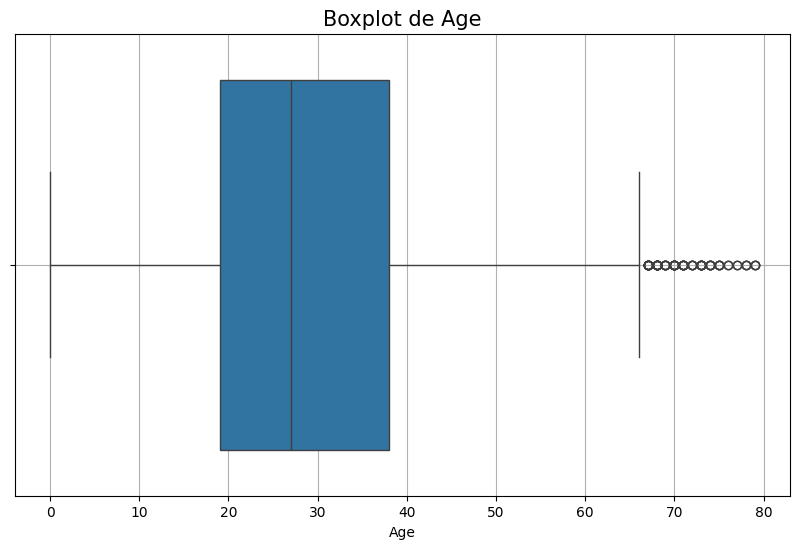

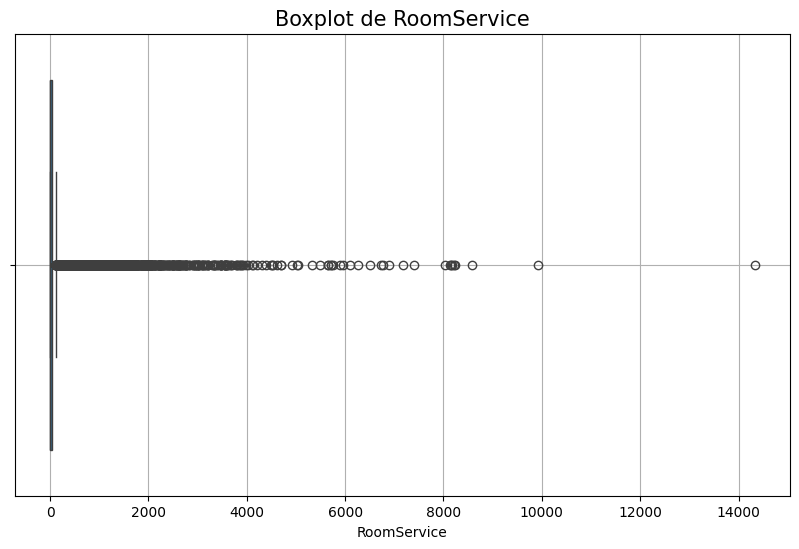

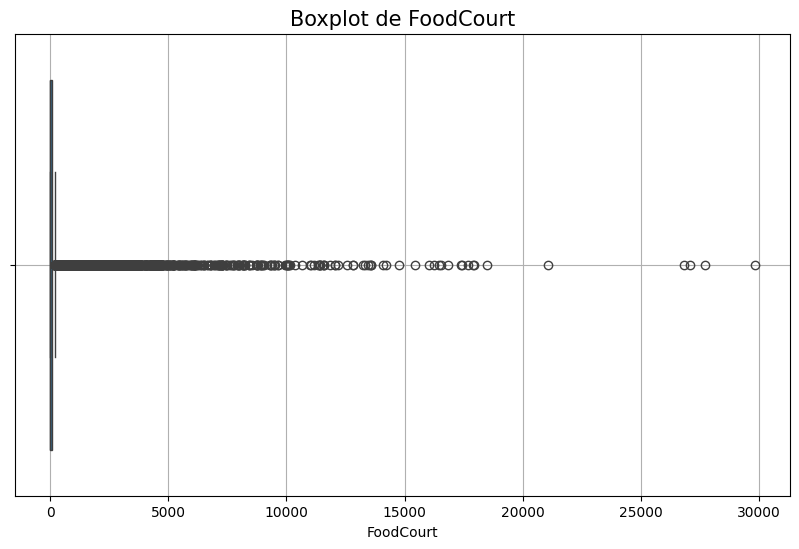

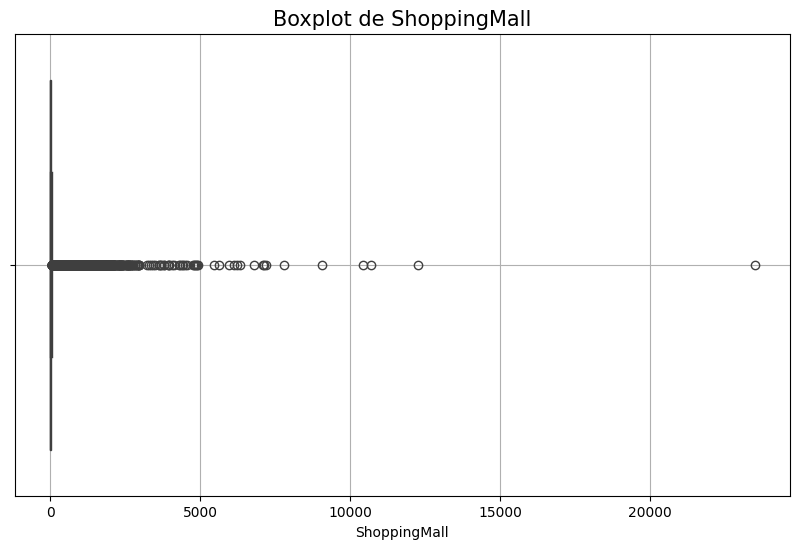

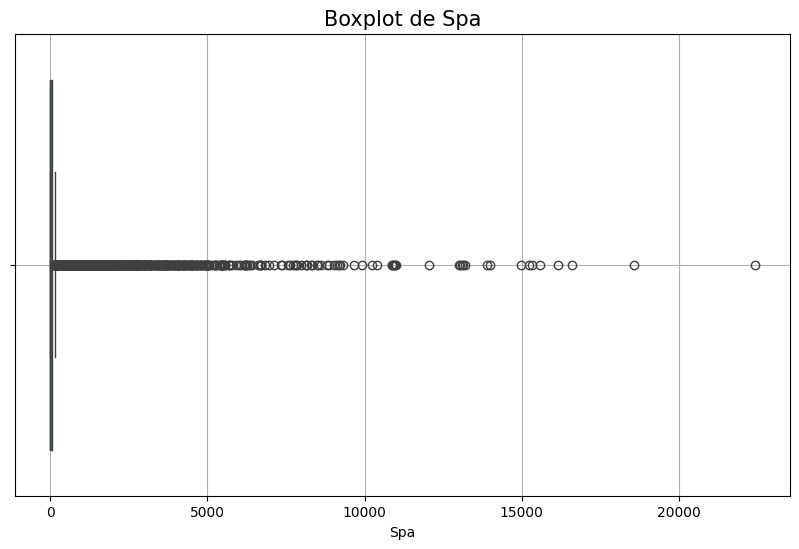

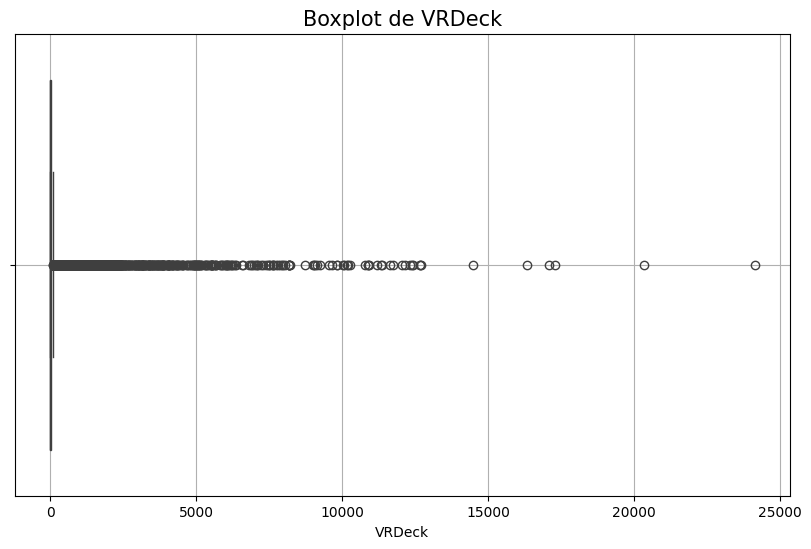

In [2522]:
import matplotlib.pyplot as plt

def plot_numeric_histograms(df):
    # Seleccionamos todas las columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Crear un histograma para cada columna numérica
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column}', fontsize=15)
        plt.grid(True)
        plt.show()

plot_numeric_histograms(df_modified)

In [2523]:
def identify_outliers(df, column):
    # Calcular cuartiles para identificar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers en esa columna
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def analyze_outliers():
    numeric_columns = df_modified.select_dtypes(include=['float64', 'int64']).columns
    
    # Iterar sobre cada columna numérica para analizar los outliers
    for column in numeric_columns:
        # Identificar outliers en la columna actual
        outliers_in_column = identify_outliers(df_modified, column)
        
        print(f"\n{Fore.LIGHTCYAN_EX}Ver la proporción de `Transported` entre los outliers de {column}:\n{Fore.RESET}")
        if not outliers_in_column.empty:
            outliers_transport = outliers_in_column['Transported'].value_counts(normalize=True)
            print(outliers_transport)
        else:
            print(f"No hay outliers en {column}")
        
        # Filtrar pasajeros que no son outliers en la columna actual
        non_outliers_in_column = df_modified[~df_modified.index.isin(outliers_in_column.index)]

        print(f"\n{Fore.LIGHTCYAN_EX}Ver la proporción de `Transported` entre los no-outliers de {column}:\n{Fore.RESET}")
        non_outliers_transport = non_outliers_in_column['Transported'].value_counts(normalize=True)
        print(non_outliers_transport)

# Ejecutar la función
analyze_outliers()




Ver la proporción de `Transported` entre los outliers de Age:

Transported
False    0.532468
True     0.467532
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los no-outliers de Age:

Transported
True     0.503946
False    0.496054
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los outliers de RoomService:

Transported
False    0.795809
True     0.204191
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los no-outliers de RoomService:

Transported
True     0.585187
False    0.414813
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los outliers de FoodCourt:

Transported
False    0.572134
True     0.427866
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los no-outliers de FoodCourt:

Transported
True     0.523726
False    0.476274
Name: proportion, dtype: float64

Ver la proporción de `Transported` entre los outliers de ShoppingMall:

Transported
False   

## Decidimos no tratar los outliers en Age e imputar los nulos con la mediana 

In [2524]:
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer para imputar la mediana
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a la columna 'Age'
df_modified['Age'] = imputer.fit_transform(df_modified[['Age']])

# Verificar si quedan valores nulos en Age
print(f"\n{Fore.CYAN}Verificar si quedan valores nulos en Age:\n{Fore.RESET}")
print(df_modified['Age'].isnull().sum())



Verificar si quedan valores nulos en Age:

0


## Continuamos con el analisis de los Outliers

In [2525]:
# Comparar la proporción de VIPs entre los outliers y no-outliers de cada columna de gastos
def analyze_vip_vs_outliers(column):
    # Identificar los outliers en la columna actual
    outliers_in_column = identify_outliers(df_modified, column)
    
    # Proporción de pasajeros VIP entre los outliers
    vip_outliers = outliers_in_column['VIP'].value_counts(normalize=True)

    print(f"\n{Fore.LIGHTCYAN_EX}Proporción de VIPs entre los outliers de {column}:{Fore.RESET}\n\n{vip_outliers}\n")
    
    # Proporción de pasajeros VIP entre los no-outliers
    non_outliers_in_column = df_modified[~df_modified.index.isin(outliers_in_column.index)]
    vip_non_outliers = non_outliers_in_column['VIP'].value_counts(normalize=True)
    print(f"\n{Fore.LIGHTCYAN_EX}Proporción de VIPs entre los no-outliers de {column}:{Fore.RESET}\n\n{vip_non_outliers}\n")

# Aplicar el análisis a las columnas de gastos
analyze_vip_vs_outliers('RoomService')
analyze_vip_vs_outliers('ShoppingMall')
analyze_vip_vs_outliers('FoodCourt')
analyze_vip_vs_outliers('Spa')
analyze_vip_vs_outliers('VRDeck')



Proporción de VIPs entre los outliers de RoomService:

VIP
False    0.964246
True     0.035754
Name: proportion, dtype: float64


Proporción de VIPs entre los no-outliers de RoomService:

VIP
False    0.979916
True     0.020084
Name: proportion, dtype: float64


Proporción de VIPs entre los outliers de ShoppingMall:

VIP
False    0.96767
True     0.03233
Name: proportion, dtype: float64


Proporción de VIPs entre los no-outliers de ShoppingMall:

VIP
False    0.978943
True     0.021057
Name: proportion, dtype: float64


Proporción de VIPs entre los outliers de FoodCourt:

VIP
False    0.9422
True     0.0578
Name: proportion, dtype: float64


Proporción de VIPs entre los no-outliers de FoodCourt:

VIP
False    0.985689
True     0.014311
Name: proportion, dtype: float64


Proporción de VIPs entre los outliers de Spa:

VIP
False    0.953009
True     0.046991
Name: proportion, dtype: float64


Proporción de VIPs entre los no-outliers de Spa:

VIP
False    0.982654
True     0.017346
Name: 

In [2526]:
# Calcular la correlación entre VIP y Transported
correlation = df_modified[['VIP', 'Transported']].corr()

# Mostrar la correlación entre VIP y Transported
correlation


,VIP,Transported
VIP,1.00000,-0.03765
Transported,-0.03765,1.00000


El hecho de que la correlación entre VIP y Transported sea tan débil (-0.03608) sugiere que el estatus de ser VIP no tiene una relación significativa con el resultado de haber sido transportado. Esto plantea la hipótesis de que los outliers en los gastos de los pasajeros VIP podrían no ser muy relevantes para predecir si un pasajero fue transportado.

Dado que VIP en sí no tiene una gran influencia, los outliers en gastos altos pueden estar introduciendo ruido en lugar de contribuir a una mejor predicción, por lo que decidimos aplicar transformaciones para reducir la influencia de los valores extremos.

In [2527]:
# Aplicar transformación logarítmica a los gastos
df_modified['RoomService_log'] = np.log1p(df_modified['RoomService'])
df_modified['ShoppingMall_log'] = np.log1p(df_modified['ShoppingMall'])
df_modified['FoodCourt_log'] = np.log1p(df_modified['FoodCourt'])
df_modified['Spa_log'] = np.log1p(df_modified['Spa'])
df_modified['VRDeck_log'] = np.log1p(df_modified['VRDeck'])

# Eliminar las columnas originales después de la transformación logarítmica
df_modified.drop(['RoomService', 'ShoppingMall', 'FoodCourt', 'Spa', 'VRDeck'], axis=1, inplace=True)



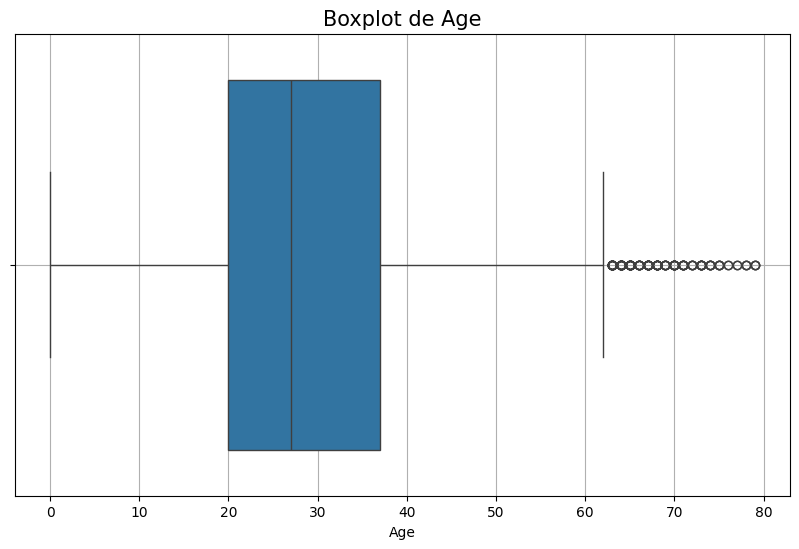

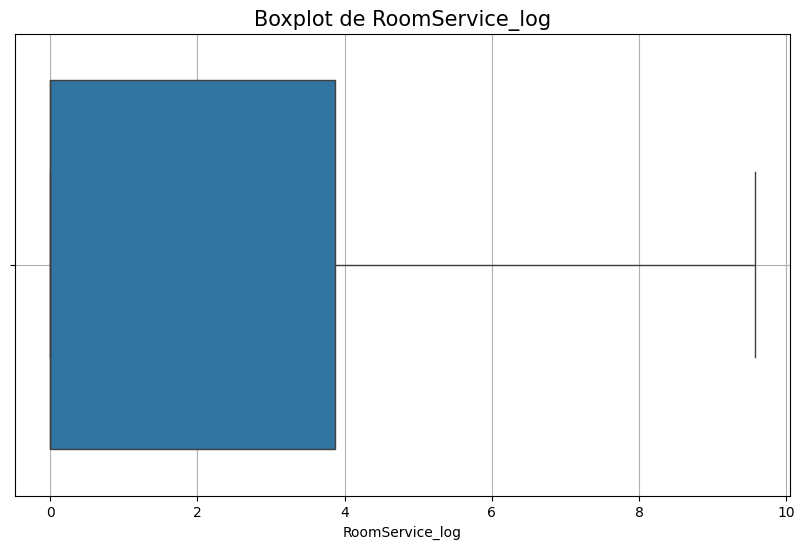

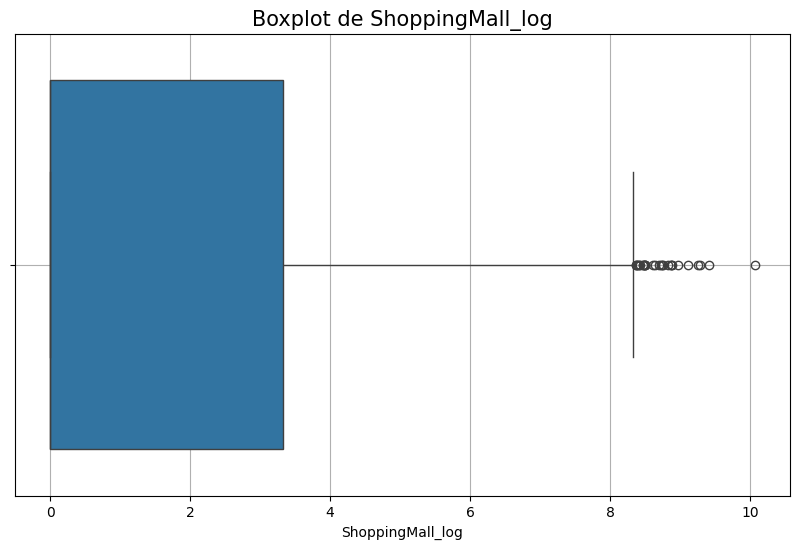

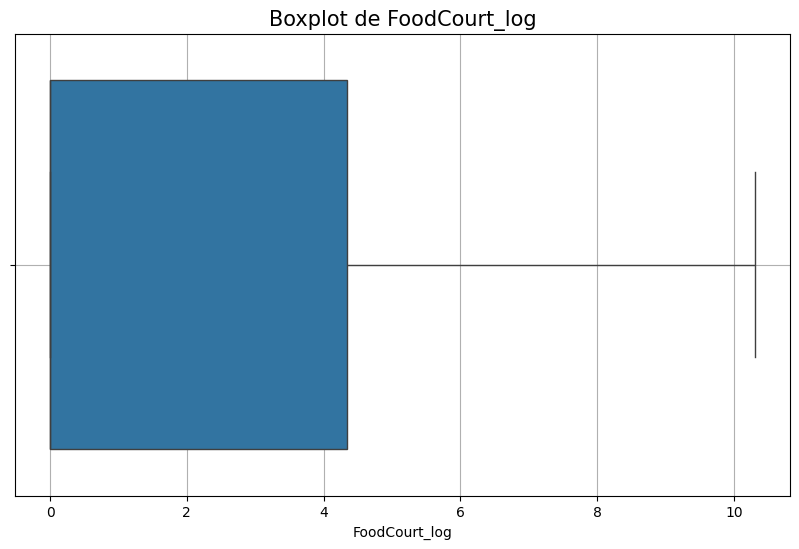

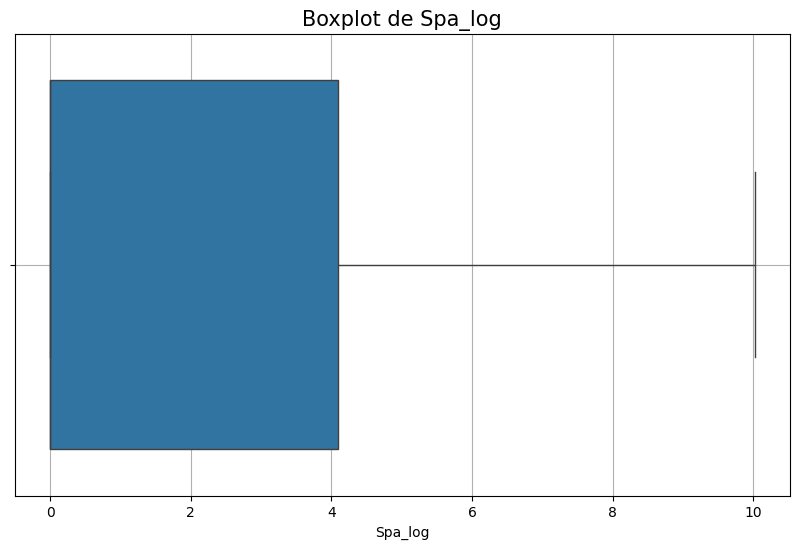

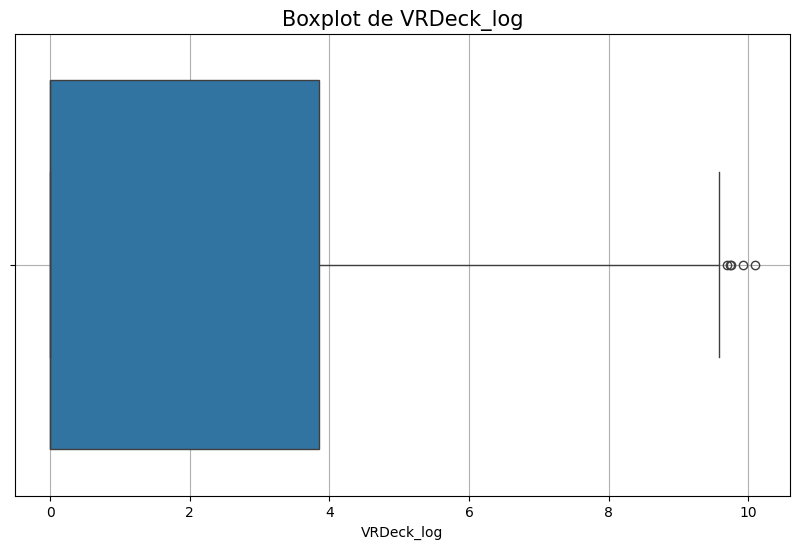

In [2528]:
plot_numeric_histograms(df_modified)

### Imputamos los valores nulos con la mediana en 'RoomService_log', 'ShoppingMall_log', 'FoodCourt_log', 'Spa_log', 'VRDeck_log'

In [2529]:
from sklearn.impute import SimpleImputer

# Crear un imputador usando la mediana
imputer = SimpleImputer(strategy='median')

# Seleccionar las columnas logarítmicas
log_columns = ['RoomService_log', 'ShoppingMall_log', 'FoodCourt_log', 'Spa_log', 'VRDeck_log']

# Aplicar la imputación con la mediana
df_modified[log_columns] = imputer.fit_transform(df_modified[log_columns])

In [2530]:
# Verificar si quedan valores nulos en las columnas logarítmicas
print(f"\n{Fore.LIGHTCYAN_EX}Verificar si quedan valores nulos en las columnas logarítmicas:{Fore.RESET}\n")
print(df_modified[log_columns].isnull().sum())



Verificar si quedan valores nulos en las columnas logarítmicas:

RoomService_log     0
ShoppingMall_log    0
FoodCourt_log       0
Spa_log             0
VRDeck_log          0
dtype: int64


### Imputamos los nulos en VIP

In [2531]:
def imputar_vip(df):
    # Dividir la columna Cabin en Deck, Num, y Side
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

    # Calcular la proporción de VIPs por Deck
    vip_by_deck = pd.crosstab(df['Deck'], df['VIP'], normalize='index')

    # Calcular la proporción de VIPs por Group (usando PassengerId)
    df['Group'] = df['PassengerId'].str.split('_', expand=True)[0]
    group_vip_counts = pd.crosstab(df['Group'], df['VIP'], normalize='index').fillna(0)

    # Calcular la probabilidad global de ser VIP
    global_vip_prob = df['VIP'].mean()

    # Función interna para imputar VIP en función de gastos, Deck, y Group
    def impute_vip(row):
        if pd.isnull(row['VIP']):
            # Sumar los gastos en servicios
            total_spending = row['RoomService_log'] + row['FoodCourt_log'] + row['ShoppingMall_log'] + row['Spa_log'] + row['VRDeck_log']
            
            # Primera condición: Imputar VIP basado en los gastos
            if total_spending > 0:
                return True
            else:
                # Segunda condición: Si no hay gastos, imputar basado en Deck
                deck = row['Deck']
                if deck in vip_by_deck.index:
                    prob_vip_deck = vip_by_deck.loc[deck, True]
                    return np.random.choice([True, False], p=[prob_vip_deck, 1 - prob_vip_deck])
                else:
                    # Si Deck no tiene probabilidad, imputar basado en Group
                    group = row['Group']
                    if group in group_vip_counts.index:
                        prob_vip_group = group_vip_counts.loc[group, True]
                    else:
                        # Si Group no está en la tabla, usar la probabilidad global
                        prob_vip_group = global_vip_prob

                    return np.random.choice([True, False], p=[prob_vip_group, 1 - prob_vip_group])
        
        # Si ya tiene un valor en VIP, lo mantiene
        return row['VIP']

    # Aplicar la imputación de VIP en función de gastos, Deck, y Group
    df['VIP'] = df.apply(impute_vip, axis=1)

    # Si después de esta imputación quedan valores nulos, rellenar con el valor más frecuente (modo)
    if df['VIP'].isnull().sum() > 0:
        df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

    # Convertir explícitamente a booleano para evitar problemas
    df['VIP'] = df['VIP'].astype(bool)

    # Verificar si quedan valores nulos en VIP
    print(f"\n{Fore.CYAN}Valores nulos restantes en VIP después de la imputación:{Fore.RESET} {df['VIP'].isnull().sum()}")

    # Comprobar la distribución de VIP después de la imputación
    print(f"\n{Fore.CYAN}Distribución de VIP después de la imputación:{Fore.RESET}\n{df['VIP'].value_counts(normalize=True)}")

# Aplicar la función al DataFrame
imputar_vip(df_modified)



Valores nulos restantes en VIP después de la imputación: 0

Distribución de VIP después de la imputación:
VIP
False    0.964224
True     0.035776
Name: proportion, dtype: float64


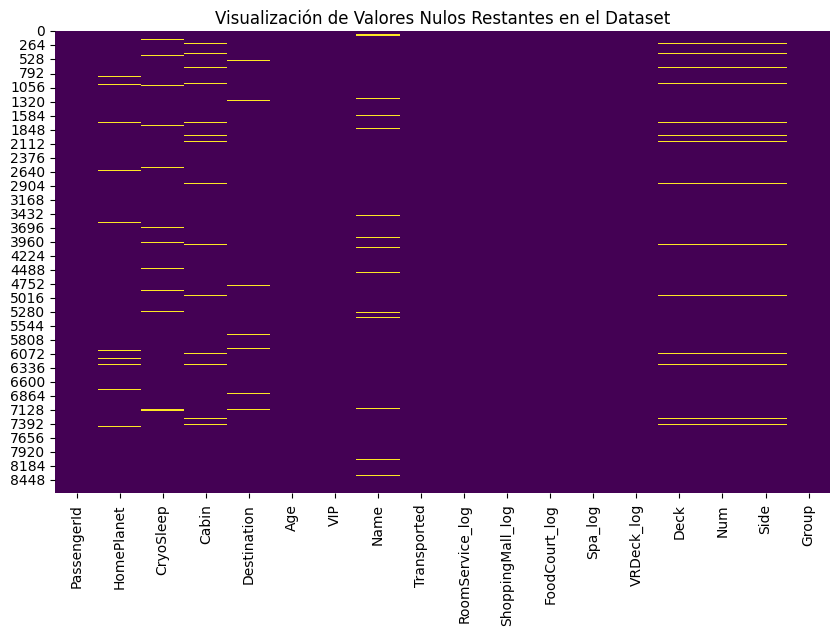

In [2532]:
# Crear un gráfico de calor (heatmap) para visualizar los valores nulos restantes en el DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df_modified.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Nulos Restantes en el Dataset')
plt.show()


## Aun así siguen quedando bastantes valores nulos  que debemos tratar

### Imputar Apellidos

In [2533]:
# Extraer el apellido del nombre (suponiendo que el apellido es la última palabra del nombre)
df_modified['LastName'] = df_modified['Name'].apply(lambda x: x.split()[-1] if pd.notnull(x) else None)

In [2534]:
def imputar_lastname_por_grupo(df):
    # Verificar cuántos valores nulos hay inicialmente en LastName
    print(f"Valores nulos iniciales en LastName: {df['LastName'].isnull().sum()}")

    # Filtrar los grupos donde LastName no es nulo para tener apellidos de referencia
    groups_with_lastname = df.dropna(subset=['LastName'])

    def imputar_fila(row):
        # Imputar solo si LastName es nulo
        if pd.isnull(row['LastName']):
            group = row['Group']
            
            # Filtrar el grupo actual para buscar apellidos
            potential_lastnames = groups_with_lastname[groups_with_lastname['Group'] == group]['LastName']
            
            # Si hay apellidos disponibles en el grupo, imputar el más frecuente
            if len(potential_lastnames) > 0:
                imputed_lastname = potential_lastnames.mode()[0]
                print(f"Imputando apellido {imputed_lastname} para el grupo {group}.")
                return imputed_lastname
        
        return row['LastName']  # Dejar sin cambios si no se puede imputar

    # Aplicar la imputación fila por fila
    df['LastName'] = df.apply(imputar_fila, axis=1)

    # Verificar cuántos valores nulos quedan después de la imputación
    print(f"Valores nulos restantes en LastName después de la imputación: {df['LastName'].isnull().sum()}")

    return df

df_modified = imputar_lastname_por_grupo(df_modified)

Valores nulos iniciales en LastName: 200
Imputando apellido Keen para el grupo 0064.
Imputando apellido Datte para el grupo 0082.
Imputando apellido Handertiz para el grupo 0108.
Imputando apellido Siveduced para el grupo 0330.
Imputando apellido Perle para el grupo 0337.
Imputando apellido Hoppernardy para el grupo 0448.
Imputando apellido Cardner para el grupo 0657.
Imputando apellido Ennalve para el grupo 0753.
Imputando apellido Mclardson para el grupo 0770.
Imputando apellido Sandul para el grupo 0865.
Imputando apellido Fawnsive para el grupo 0933.
Imputando apellido Sweekstarks para el grupo 0984.
Imputando apellido Seen para el grupo 1108.
Imputando apellido Hessey para el grupo 1155.
Imputando apellido Pronfraked para el grupo 1238.
Imputando apellido Pimne para el grupo 1287.
Imputando apellido Kake para el grupo 1393.
Imputando apellido Sweene para el grupo 1478.
Imputando apellido Sosalinson para el grupo 1491.
Imputando apellido Jeffey para el grupo 1507.
Imputando apellid

### Imputar Cabin

In [2535]:
# Agrupar por 'Cabin' y contar cuántos pasajeros tienen el mismo apellido en la misma cabina
df_modified['MismoGrupo'] = df_modified.groupby('Cabin')['Group'].transform(lambda x: x.duplicated(keep=False))

In [2536]:
# Paso 1: Contar la frecuencia de cada apellido en el dataset
apellido_counts = df_modified['LastName'].value_counts()

# Paso 2: Filtrar los pasajeros cuyos apellidos aparecen más de una vez
passengers_with_shared_lastname = df_modified[df_modified['LastName'].isin(apellido_counts[apellido_counts > 1].index)]

# Filtrar los pasajeros que comparten apellido y grupo
passengers_with_shared_lastname_group_and_planet = passengers_with_shared_lastname.groupby(['LastName', 'Group']).filter(lambda x: len(x) > 1)

# Paso 4: Calcular cuántos de estos pasajeros también comparten la misma cabina
shared_cabin = passengers_with_shared_lastname_group_and_planet.groupby(['LastName', 'Group', 'Cabin']).size().reset_index(name='count')

# Contar cuántos grupos comparten apellido, grupo y HomePlanet y también cabina
shared_cabin_counts = shared_cabin[shared_cabin['count'] > 1]

# Paso 5: Calcular la proporción de personas que comparten apellido, grupo, y además comparten cabina
total_shared_lastname_group_and_planet = len(passengers_with_shared_lastname_group_and_planet)
total_shared_cabin = shared_cabin_counts['count'].sum()

# Calcular la probabilidad
probability_shared_cabin = total_shared_cabin / total_shared_lastname_group_and_planet

# Mostrar el resultado
print(f"\n{Fore.LIGHTCYAN_EX}La probabilidad de que una persona que comparte apellido y grupo también esté en la misma cabina es:{Fore.RESET} {probability_shared_cabin:.2%}")


La probabilidad de que una persona que comparte apellido y grupo también esté en la misma cabina es: 77.95%


In [2537]:
def imputar_cabin_por_probabilidad(df):
    # Paso 1: Filtrar por apellidos compartidos
    apellido_counts = df['LastName'].value_counts()
    passengers_with_shared_lastname = df[df['LastName'].isin(apellido_counts[apellido_counts > 1].index)]

    # Pasajeros con cabina asignada
    passengers_with_cabin = passengers_with_shared_lastname.dropna(subset=['Cabin'])

    def imputar_fila(row):
        # Imputación basada en apellido y grupo
        if pd.isnull(row['Cabin']):
            group = row['Group']
            lastname = row['LastName']
            
            # Filtrar compañeros de cabina basados en apellido y grupo
            potential_cabin_mates = passengers_with_cabin[(passengers_with_cabin['LastName'] == lastname) & 
                                                          (passengers_with_cabin['Group'] == group)]
            
            # Si hay coincidencias en apellido y grupo, imputar la cabina más común
            if len(potential_cabin_mates) > 0:
                imputed_cabin = potential_cabin_mates['Cabin'].mode()[0]
                print(f"Lo más probable es que {lastname} se encuentre en la cabina {imputed_cabin}, imputando el valor.")
                return imputed_cabin

        # Si aún queda nulo, buscar compañeros de cabina solo basados en el grupo
        if pd.isnull(row['Cabin']):
            potential_cabin_mates_group = df[(df['Group'] == row['Group']) & df['Cabin'].notnull()]
            
            # Si hay coincidencias en el grupo, imputar la cabina más común
            if len(potential_cabin_mates_group) > 0:
                imputed_cabin_group = potential_cabin_mates_group['Cabin'].mode()[0]
                print(f"Lo más probable es que alguien en el grupo {group} se encuentre en la cabina {imputed_cabin_group}, imputando el valor.")
                return imputed_cabin_group
        
        return row['Cabin']  # Dejar sin cambios si no se puede imputar

    # Aplicar la imputación fila por fila
    df['Cabin'] = df.apply(imputar_fila, axis=1)

    print(f"\n{Fore.LIGHTCYAN_EX}Imputación de valores nulos en 'Cabin' completada.{Fore.RESET}")
    return df


## Vamos a eliminar los nulos de Destination, HomePlanet y Cryosleep antes de seguir con las cabinas 

### Destination

In [2538]:
import pandas as pd

def calcular_probabilidad(df, item, column):
    """
    Calcula la probabilidad de cada item para cada column en el DataFrame.
    
    Parameters:
    df (pandas.DataFrame): El DataFrame que contiene las columnas 'column' y 'item'.
    
    Returns:
    pandas.DataFrame: Un DataFrame que muestra las probabilidades de cada 'item' para cada 'column'.
    """
    
    # Calcular las frecuencias relativas de 'item' para cada 'HomePlanet'
    probabilidad_condicional = df.groupby(column)[item].value_counts(normalize=True).unstack(fill_value=0)
    
    return probabilidad_condicional


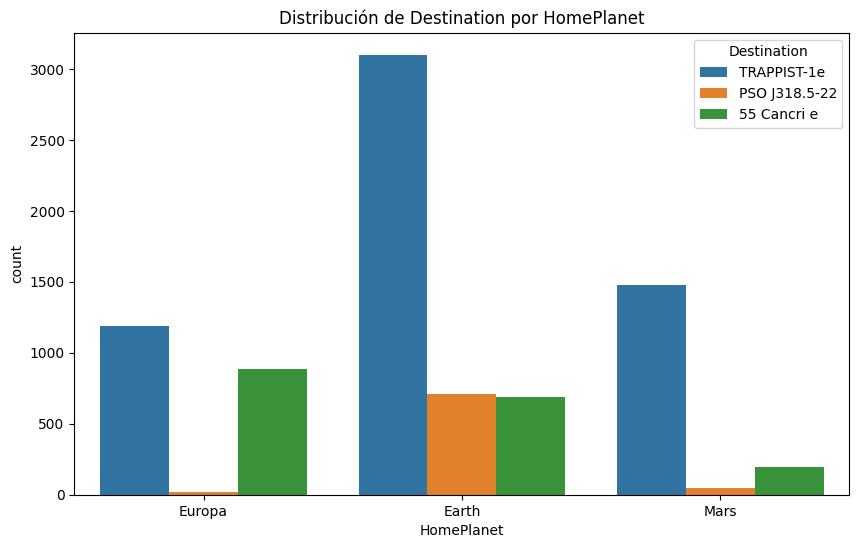

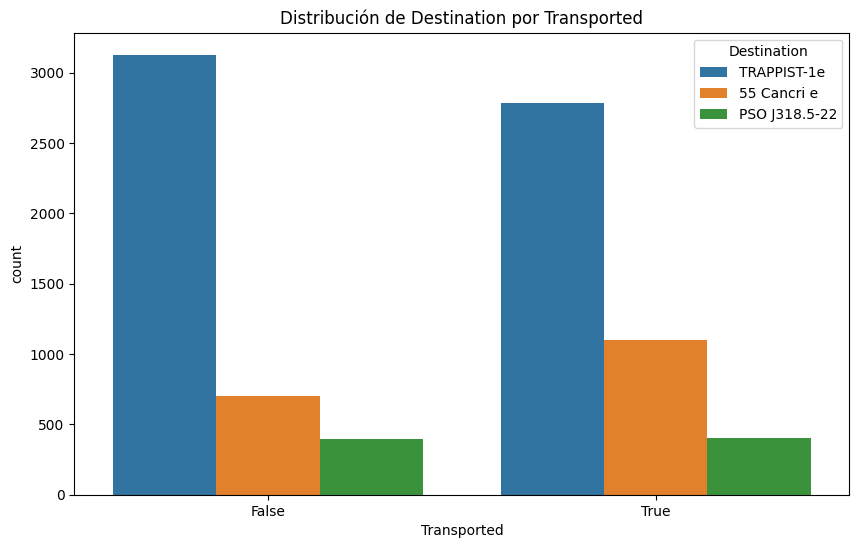

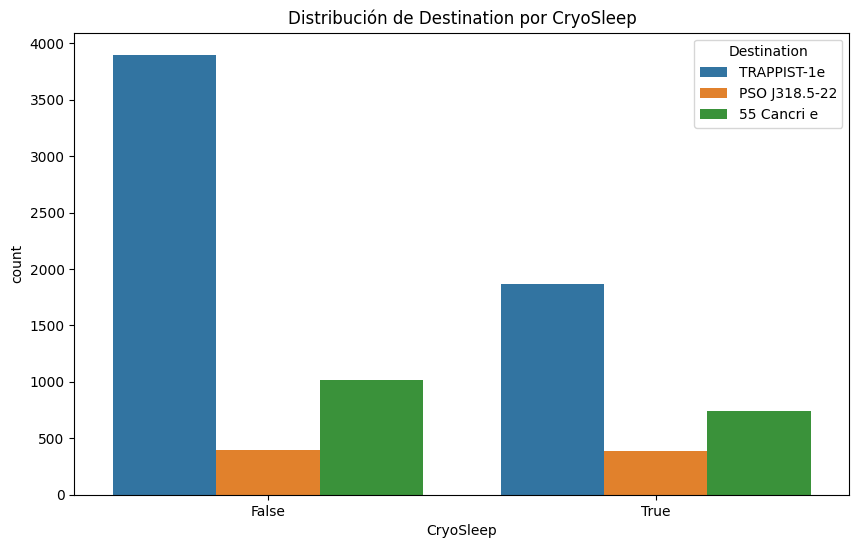

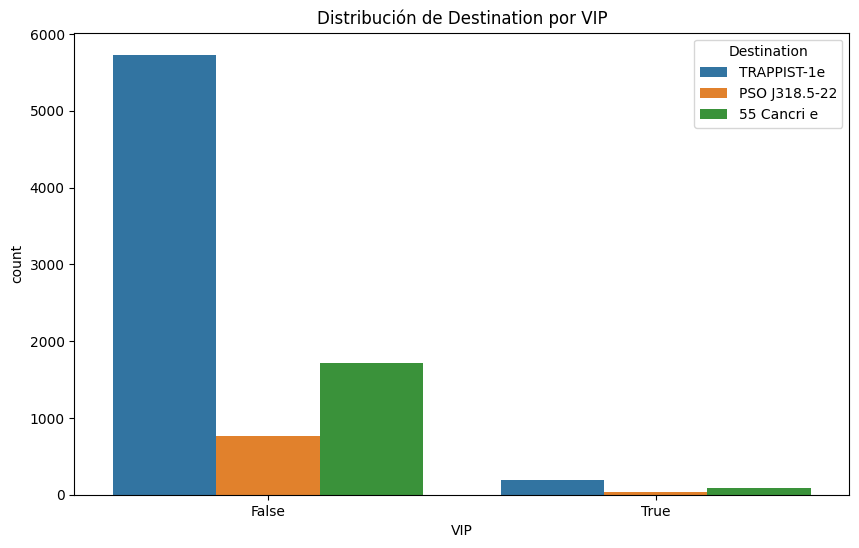

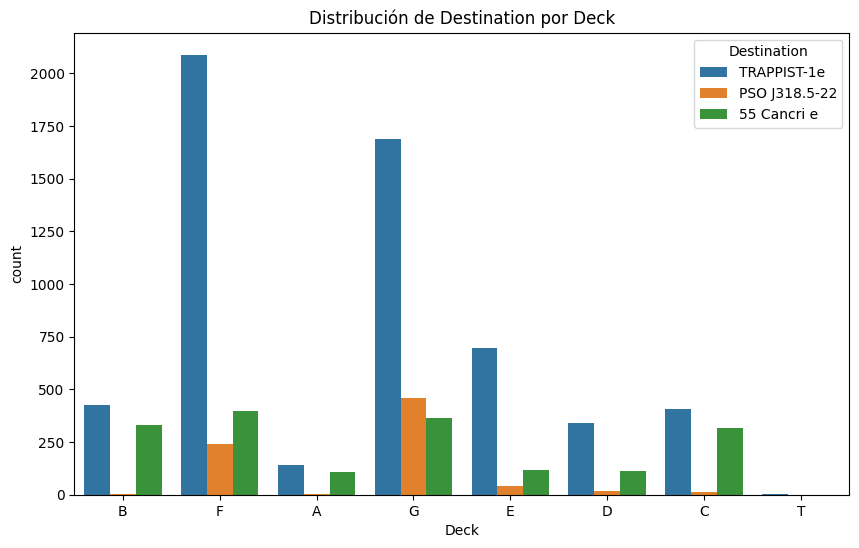

In [2539]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['HomePlanet','Transported','CryoSleep','VIP','Deck']
        
for column in columns:
    # Comparar la distribución 
    plt.figure(figsize=(10,6))
    sns.countplot(data=df_modified, x=column, hue='Destination')
    plt.title(f'Distribución de Destination por {column}')
    plt.show()


Deck parece tener un poco mas de importancia

## Vamos a escalar las variables numericas

In [2540]:
from sklearn.preprocessing import MinMaxScaler

# Instanciar el escalador
scaler = MinMaxScaler()

# Seleccionar las columnas de gastos
gasto_columns = ['RoomService_log', 'ShoppingMall_log', 'FoodCourt_log', 'Spa_log', 'VRDeck_log']

# Aplicar la normalización Min-Max
df_modified[gasto_columns] = scaler.fit_transform(df_modified[gasto_columns])

# Normalización Min-Max de Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizar 'Age'
df_modified['Age'] = scaler.fit_transform(df_modified[['Age']])


In [2541]:
def imputar_nulos_por_probabilidad(df, item, column):
    """
    Imputa los valores nulos de 'item' en función de las probabilidades condicionales basadas en 'column'.
    
    Parameters:
    df (pandas.DataFrame): El DataFrame que contiene las columnas 'item' y 'column'.
    item (str): La columna que contiene los valores nulos a imputar (ej. 'HomePlanet').
    column (str): La columna que se usa como referencia (ej. 'Deck').
    probabilidades (pandas.DataFrame): Un DataFrame de probabilidades condicionales calculado previamente.
    
    Returns:
    pandas.DataFrame: El DataFrame con los valores nulos imputados.
    """

    probabilidades = calcular_probabilidad(df_modified, item=item, column=column)
    
    # Iterar sobre las filas donde 'item' es nulo
    for idx, row in df[df[item].isnull()].iterrows():
        valor_referencia = row[column]
        
        # Verificar que el valor de 'column' no sea nulo
        if pd.notnull(valor_referencia):
            try:
                # Obtener las probabilidades del 'item' en función del valor de 'column'
                probas = probabilidades.loc[valor_referencia]
                
                # Imputar el valor de 'item' basado en una elección aleatoria ponderada por las probabilidades
                imputed_value = np.random.choice(probas.index, p=probas.values)
                df.at[idx, item] = imputed_value
                
                print(f"Imputando {item}: {imputed_value} para {column}: {valor_referencia}")
            except KeyError:
                # Si no se encuentran probabilidades para la referencia, omitir la imputación
                print(f"No se encontraron probabilidades para {column}: {valor_referencia}")
                pass
    
    return df

# # Usar la función para imputar los valores nulos en HomePlanet
# df_modified = imputar_nulos_por_probabilidad(df_modified, item='Destination', column='Deck')

# # Contar los nulos restantes en la columna 'Destination'
# nulos_destination = df_modified['Destination'].isnull().sum()

# # Mostrar el resultado
# print(f"\n{Fore.CYAN}Nulos restantes en 'Destination': {nulos_destination}")

In [2542]:
# def imputar_destination_por_probabilidad(df):
#     # Primero, calculamos las probabilidades condicionales en base a las combinaciones de las variables más relevantes
#     probabilidad_condicional = df.dropna(subset=['Destination']).groupby(['HomePlanet', 'Transported', 'CryoSleep', 'VIP', 'Deck'])['Destination'].value_counts(normalize=True).unstack(fill_value=0)
    
#     # Iteramos sobre los valores nulos de Destination
#     for idx, row in df[df['Destination'].isnull()].iterrows():
#         homeplanet = row['HomePlanet']
#         transported = row['Transported']
#         cryosleep = row['CryoSleep']
#         vip = row['VIP']
#         deck = row['Deck']
        
#         # Verificamos si existen probabilidades calculadas para esta combinación
#         try:
#             probas = probabilidad_condicional.loc[(homeplanet, transported, cryosleep, vip, deck)]
#             # Si existen probabilidades, elegimos el destino en función de ellas
#             imputed_destination = np.random.choice(probas.index, p=probas.values)
#             df.at[idx, 'Destination'] = imputed_destination
#             print(f"Pasajero en HomePlanet: {homeplanet}, Transported: {transported}, CryoSleep: {cryosleep}, VIP: {vip}, Deck: {deck} - Imputando Destination: {imputed_destination}")
#         except KeyError:
#             # Si no hay suficiente información para la combinación, lo dejamos nulo
#             print(f"No se encontró suficiente información para imputar el Destination del pasajero con HomePlanet: {homeplanet}, Transported: {transported}, CryoSleep: {cryosleep}, VIP: {vip}, Deck: {deck}.")
#             pass

#     return df


In [2543]:
def imputar_homeplanet_por_probabilidad(df):
    # Primero, calculamos las probabilidades condicionales en base a las combinaciones de las variables más relevantes
    probabilidad_condicional = df.dropna(subset=['HomePlanet']).groupby(['Destination', 'Transported', 'CryoSleep', 'VIP', 'Deck'])['HomePlanet'].value_counts(normalize=True).unstack(fill_value=0)
    
    # Iteramos sobre los valores nulos de HomePlanet
    for idx, row in df[df['HomePlanet'].isnull()].iterrows():
        destination = row['Destination']
        transported = row['Transported']
        cryosleep = row['CryoSleep']
        vip = row['VIP']
        deck = row['Deck']
        
        # Verificamos si existen probabilidades calculadas para esta combinación
        try:
            probas = probabilidad_condicional.loc[(destination, transported, cryosleep, vip, deck)]
            # Si existen probabilidades, elegimos el HomePlanet en función de ellas
            imputed_homeplanet = np.random.choice(probas.index, p=probas.values)
            df.at[idx, 'HomePlanet'] = imputed_homeplanet
            print(f"Pasajero en Destination: {destination}, Transported: {transported}, CryoSleep: {cryosleep}, VIP: {vip}, Deck: {deck} - Imputando HomePlanet: {imputed_homeplanet}")
        except KeyError:
            # Si no hay suficiente información para la combinación, lo dejamos nulo
            print(f"No se encontró suficiente información para imputar el HomePlanet del pasajero con Destination: {destination}, Transported: {transported}, CryoSleep: {cryosleep}, VIP: {vip}, Deck: {deck}.")
            pass

    return df

In [2544]:
def imputar_destination_homeplanet(df):
    # Imputar valores faltantes en 'Destination'
    for index, row in df[df['Destination'].isnull()].iterrows():
        # Variables condicionales: HomePlanet, VIP, CryoSleep, Transported, Deck
        homeplanet = row['HomePlanet']
        vip = row['VIP']
        cryosleep = row['CryoSleep']
        transported = row['Transported']
        deck = row['Deck']
        
        # Filtrar filas con condiciones similares
        similar_rows = df[(df['HomePlanet'] == homeplanet) &
                          (df['VIP'] == vip) &
                          (df['CryoSleep'] == cryosleep) &
                          (df['Transported'] == transported) &
                          (df['Deck'] == deck) &
                          df['Destination'].notnull()]
        
        if len(similar_rows) > 0:
            # Imputar la moda (valor más frecuente) de 'Destination'
            mode_destination = similar_rows['Destination'].mode()[0]
            df.at[index, 'Destination'] = mode_destination
        else:
            # Si no hay coincidencias, imputar aleatoriamente en base a la probabilidad
            df.at[index, 'Destination'] = np.random.choice(df['Destination'].dropna().unique(), p=[0.6, 0.3, 0.1])  # Ajustar probabilidades

    # Imputar valores faltantes en 'HomePlanet'
    for index, row in df[df['HomePlanet'].isnull()].iterrows():
        # Variables condicionales: Destination, VIP, CryoSleep, Transported, Deck
        destination = row['Destination']
        vip = row['VIP']
        cryosleep = row['CryoSleep']
        transported = row['Transported']
        deck = row['Deck']
        
        # Filtrar filas con condiciones similares
        similar_rows = df[(df['Destination'] == destination) &
                          (df['VIP'] == vip) &
                          (df['CryoSleep'] == cryosleep) &
                          (df['Transported'] == transported) &
                          (df['Deck'] == deck) &
                          df['HomePlanet'].notnull()]
        
        if len(similar_rows) > 0:
            # Imputar la moda (valor más frecuente) de 'HomePlanet'
            mode_homeplanet = similar_rows['HomePlanet'].mode()[0]
            df.at[index, 'HomePlanet'] = mode_homeplanet
        else:
            # Si no hay coincidencias, imputar aleatoriamente en base a la probabilidad
            df.at[index, 'HomePlanet'] = np.random.choice(df['HomePlanet'].dropna().unique(), p=[0.5, 0.4, 0.1])  # Ajustar probabilidades
    
    print(f"{Fore.CYAN}Imputación completada.{Fore.RESET}")
    return df

In [2545]:
def imputar_cryosleep_por_gastos(df):
    # Iterar sobre las filas con valores nulos en CryoSleep
    for index, row in df[df['CryoSleep'].isnull()].iterrows():
        # Sumar los gastos del pasajero
        gastos_total = row[['RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log']].sum()
        
        # Si los gastos son 0, imputar CryoSleep como True
        if gastos_total == 0:
            df.at[index, 'CryoSleep'] = True
        else:
            # Imputar CryoSleep en función de la cabina si otros pasajeros en la misma cabina están en CryoSleep
            cabina = row['Cabin']
            if pd.notnull(cabina):
                # Buscar otros pasajeros en la misma cabina
                pasajeros_en_cabina = df[df['Cabin'] == cabina]['CryoSleep']
                if pasajeros_en_cabina.notnull().any():
                    # Si al menos un pasajero tiene CryoSleep imputado, asignar el valor más común (moda)
                    df.at[index, 'CryoSleep'] = pasajeros_en_cabina.mode()[0]
                else:
                    # Si no hay pasajeros en CryoSleep que compartan cabina, buscar por otras variables
                    destination = row['Destination']
                    homeplanet = row['HomePlanet']
                    vip = row['VIP']
                    transported = row['Transported']
                    
                    # Filtrar filas con condiciones similares
                    similar_rows = df[(df['Destination'] == destination) &
                                      (df['HomePlanet'] == homeplanet) &
                                      (df['VIP'] == vip) &
                                      (df['Transported'] == transported) &
                                      df['CryoSleep'].notnull()]
                    
                    if len(similar_rows) > 0:
                        # Imputar la moda (valor más frecuente) de 'CryoSleep'
                        df.at[index, 'CryoSleep'] = similar_rows['CryoSleep'].mode()[0]
                        
    print(f"\n{Fore.CYAN}Imputación de CryoSleep en función de gastos, cabina, y otras variables completada.{Fore.RESET}")
    return df


### Seguimos tratando de eliminar los nulos de Cabin

In [2546]:
df_modified.drop(['Deck', 'Num', 'Side','MismoGrupo'], axis=1, inplace=True)

# Separar la columna 'Cabin' en 'Deck', 'Num' y 'Side'
df_modified[['Deck', 'Num', 'Side']] = df_modified['Cabin'].str.split('/', expand=True)

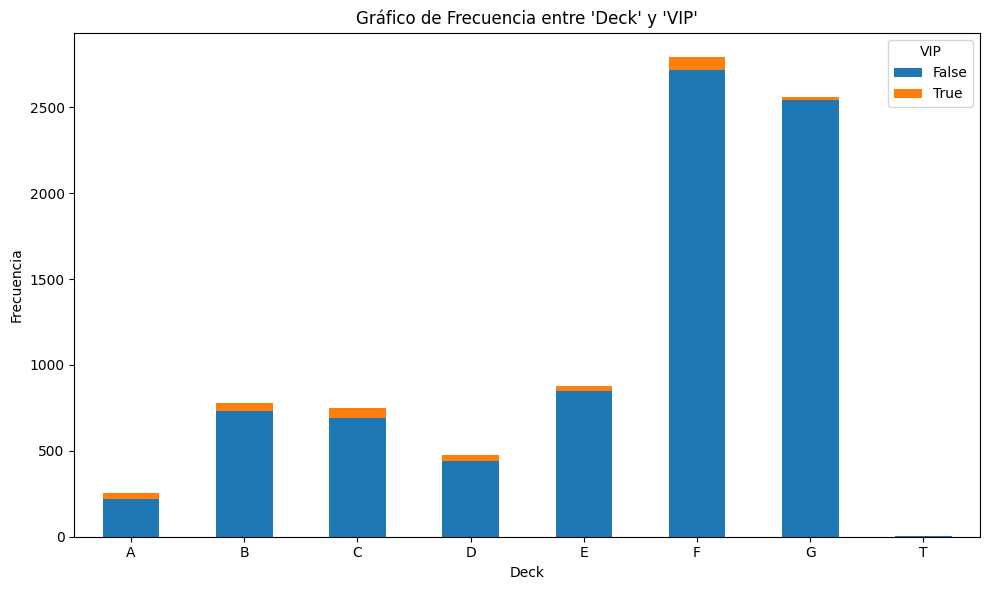

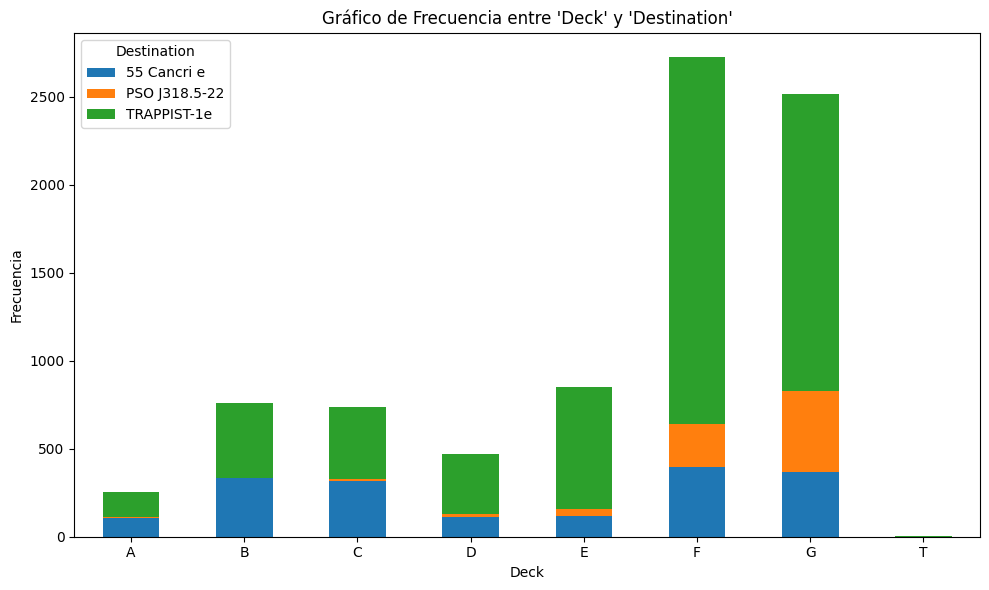

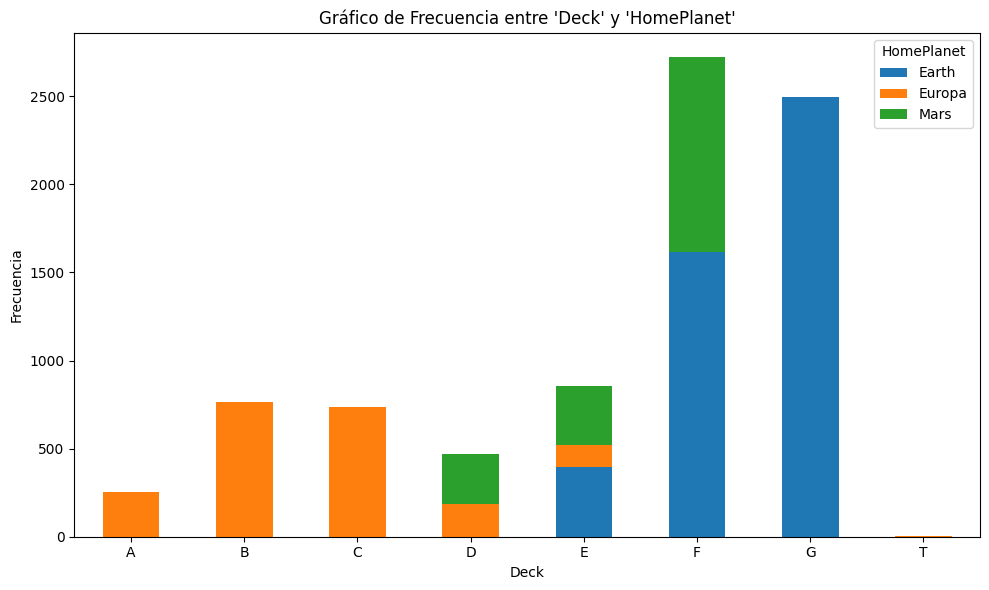

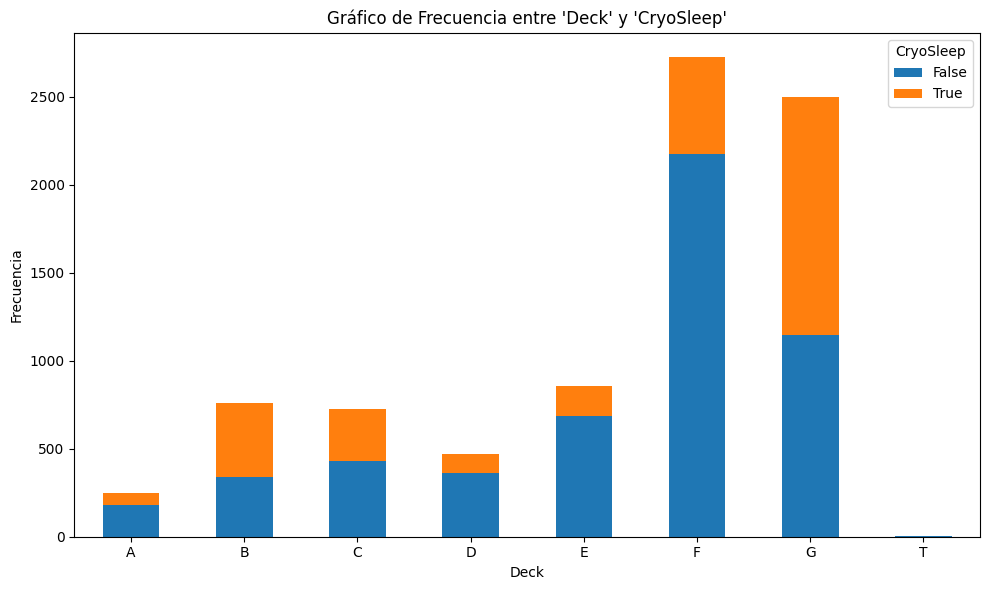

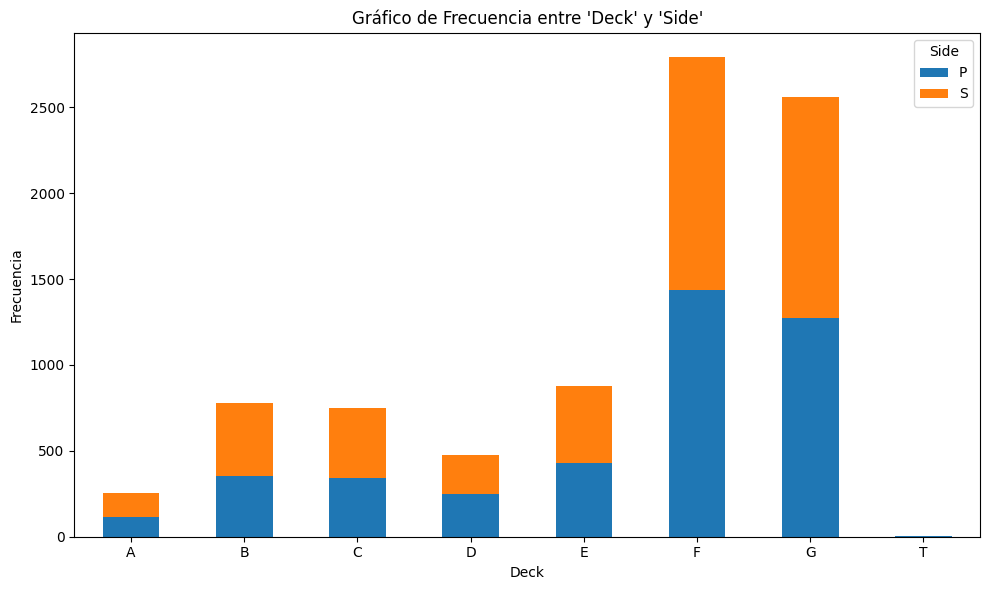

In [2547]:
import matplotlib.pyplot as plt

# Definir una función que itere a través de las columnas y genere gráficos de frecuencia
def plot_frequency_by_deck(df):
    columns_to_plot = ['VIP', 'Destination', 'HomePlanet', 'CryoSleep', 'Side']

    for column in columns_to_plot:
        crosstab_vip = pd.crosstab(df['Deck'], df[column])
        crosstab_vip.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f"Gráfico de Frecuencia entre 'Deck' y '{column}'")
        plt.xlabel('Deck')
        plt.ylabel('Frecuencia')
        plt.legend(title=column)
        plt.xticks(rotation=0)
        plt.tight_layout()  # Asegurar que el gráfico no se recorte
        plt.show()


# Ejecutar la función para generar los gráficos de frecuencia entre 'Deck' y las demás columnas
plot_frequency_by_deck(df_modified)


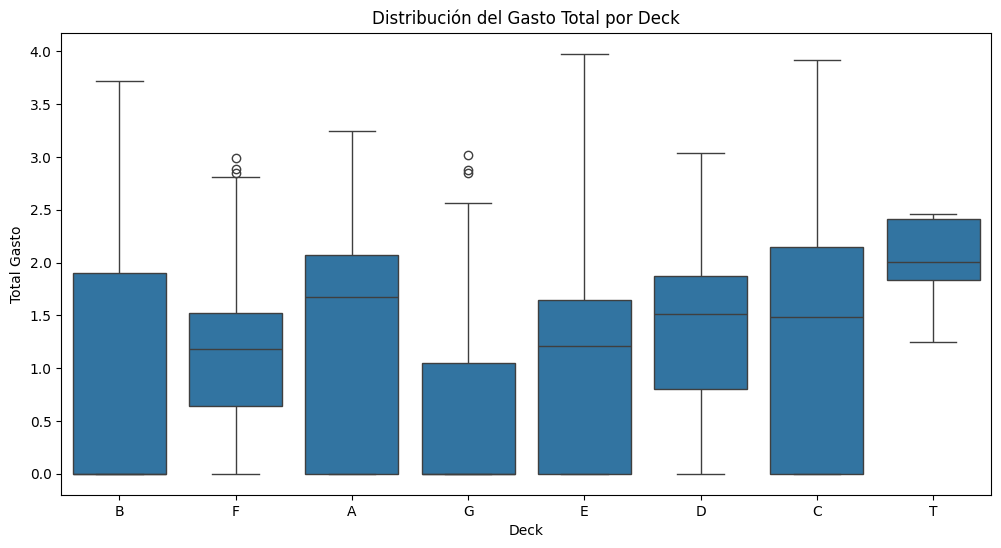

In [2548]:
# Calcular el gasto total sumando las columnas de los diferentes tipos de gastos
df_modified['Total_Gasto'] = df_modified[['RoomService_log', 'ShoppingMall_log', 'FoodCourt_log', 'Spa_log', 'VRDeck_log']].sum(axis=1)

# Crear un boxplot para visualizar la distribución de los gastos por Deck
plt.figure(figsize=(12, 6))
sns.boxplot(x='Deck', y='Total_Gasto', data=df_modified)
plt.title('Distribución del Gasto Total por Deck')
plt.xlabel('Deck')
plt.ylabel('Total Gasto')
plt.show()


### Imputamos Deck

In [2549]:
def imputar_deck(df):
    for index, row in df[df['Deck'].isnull()].iterrows():
        
        # Prioridad 1: Mismo grupo
        if not pd.isnull(row['Group']):
            group_mates = df[(df['Group'] == row['Group']) & (df['Deck'].notnull())]
            if not group_mates.empty:
                df.at[index, 'Deck'] = group_mates['Deck'].mode()[0]  # Imputar el deck más común del grupo
                continue
        
        # Prioridad 2: Gastos de lujo
        if row['RoomService_log'] > 6 or row['FoodCourt_log'] > 6 or row['Spa_log'] > 6:
            df.at[index, 'Deck'] = np.random.choice(['A', 'B', 'C'], p=[0.4, 0.3, 0.3])
            continue
        
        # Prioridad 3: Relación con HomePlanet y Destination
        if row['HomePlanet'] == 'Earth':
            df.at[index, 'Deck'] = np.random.choice(['F', 'G'], p=[0.4, 0.6])
        elif row['HomePlanet'] == 'Europa':
            df.at[index, 'Deck'] = np.random.choice(['B', 'C', 'D'], p=[0.3, 0.4, 0.3])
        elif row['HomePlanet'] == 'Mars':
            df.at[index, 'Deck'] = np.random.choice(['F', 'E'], p=[0.5, 0.5])
        
        # Prioridad 4: Transported y CryoSleep
        if row['CryoSleep'] == True:
            df.at[index, 'Deck'] = np.random.choice(['F', 'G'], p=[0.5, 0.5])
        elif row['Transported'] == True:
            df.at[index, 'Deck'] = np.random.choice(['A', 'B', 'C', 'D'], p=[0.25, 0.25, 0.25, 0.25])

    print(f"\n{Fore.CYAN}Imputación de valores nulos en 'Deck' completada.{Fore.RESET}")
    return df


## Imputamos valores nulos usando las funciones que hemos definido

In [2550]:
print(df_modified['Deck'].isnull().sum())

199


In [2551]:
def realizar_imputaciones(df):
    # Inicializar valores de nulos en cada columna
    nulos_destination_anterior = df['Destination'].isnull().sum()
    nulos_homeplanet_anterior = df['HomePlanet'].isnull().sum()
    nulos_cryosleep_anterior = df['CryoSleep'].isnull().sum()
    nulos_cabin_anterior = df['Cabin'].isnull().sum()

    # Inicializar las variables actuales de la iteración actual
    nulos_destination_actual = nulos_destination_anterior
    nulos_homeplanet_actual = nulos_homeplanet_anterior
    nulos_cryosleep_actual = nulos_cryosleep_anterior
    nulos_cabin_actual = nulos_cabin_anterior

    # Bucle para realizar imputaciones hasta que los valores nulos dejen de cambiar
    while True:
        # Imputar Deck
        if df['Deck'].isnull().sum() > 0:
            df = imputar_deck(df)
            nulos_deck_actual = df['Deck'].isnull().sum()
            print(f"{Fore.LIGHTCYAN_EX}Valores nulos restantes en Deck:{Fore.RESET} {nulos_deck_actual}\n")

        # Imputar Destination
        if df['Destination'].isnull().sum() > 0:
            for index, row in df[df['Destination'].isnull()].iterrows():
                # Variables condicionales: HomePlanet, VIP, CryoSleep, Transported, Deck
                homeplanet = row['HomePlanet']
                vip = row['VIP']
                cryosleep = row['CryoSleep']
                transported = row['Transported']
                deck = row['Deck']
                
                # Filtrar filas con condiciones similares
                similar_rows = df[(df['HomePlanet'] == homeplanet) &
                                (df['VIP'] == vip) &
                                (df['CryoSleep'] == cryosleep) &
                                (df['Transported'] == transported) &
                                (df['Deck'] == deck) &
                                df['Destination'].notnull()]
                
                if len(similar_rows) > 0:
                    # Imputar la moda (valor más frecuente) de 'Destination'
                    mode_destination = similar_rows['Destination'].mode()[0]
                    df.at[index, 'Destination'] = mode_destination
                else:
                    df = imputar_nulos_por_probabilidad(df, item='Destination', column='Deck')

            # Contar los nulos restantes en la columna 'Destination'
            nulos_destination_actual = df['Destination'].isnull().sum()
            print(f"\n{Fore.CYAN}Valores nulos restantes en Destination:{Fore.RESET} {nulos_destination_actual}\n")

        # Imputar HomePlanet
        if df['HomePlanet'].isnull().sum() > 0:
            for index, row in df[df['HomePlanet'].isnull()].iterrows():
                # Variables condicionales: HomePlanet, VIP, CryoSleep, Transported, Deck
                destination = row['Destination']
                vip = row['VIP']
                cryosleep = row['CryoSleep']
                transported = row['Transported']
                deck = row['Deck']
                
                # Filtrar filas con condiciones similares
                similar_rows = df[(df['Destination'] == destination) &
                                (df['VIP'] == vip) &
                                (df['CryoSleep'] == cryosleep) &
                                (df['Transported'] == transported) &
                                (df['Deck'] == deck) &
                                df['HomePlanet'].notnull()]
                
                if len(similar_rows) > 0:
                    # Imputar la moda (valor más frecuente) de 'HomePlanet'
                    mode_destination = similar_rows['HomePlanet'].mode()[0]
                    df.at[index, 'HomePlanet'] = mode_destination
                else:
                    df = imputar_nulos_por_probabilidad(df, item='HomePlanet', column='Destination')

            nulos_homeplanet_actual = df['HomePlanet'].isnull().sum()
            print(f"\n{Fore.CYAN}Valores nulos restantes en HomePlanet:{Fore.RESET} {nulos_homeplanet_actual}\n")

        # Imputar CryoSleep
        if df['CryoSleep'].isnull().sum() > 0:
            df = imputar_cryosleep_por_gastos(df)
            if df['CryoSleep'].isnull().sum() <= 8:
                df = imputar_nulos_por_probabilidad(df, item='CryoSleep', column='Deck')

            nulos_cryosleep_actual = df['CryoSleep'].isnull().sum()
            print(f"{Fore.LIGHTCYAN_EX}Valores nulos restantes en CryoSleep:{Fore.RESET} {nulos_cryosleep_actual}\n")

        # Imputar Cabin
        if df['Cabin'].isnull().sum() > 0:
            print(f"\n{Fore.LIGHTCYAN_EX}Imputar Cabin por probabilidad de estar en la misma cabina teniendo el mismo apellido:{Fore.RESET} {probability_shared_cabin:.2%}")
            df = imputar_cabin_por_probabilidad(df)
            nulos_cabin_actual = df['Cabin'].isnull().sum()
            print(f"{Fore.LIGHTCYAN_EX}Valores nulos restantes en Cabin:{Fore.RESET} {nulos_cabin_actual}\n")

        # Condición de parada: si los valores nulos no cambian entre iteraciones, se rompe el bucle
        if (nulos_destination_actual == nulos_destination_anterior and
            nulos_homeplanet_actual == nulos_homeplanet_anterior and
            nulos_cryosleep_actual == nulos_cryosleep_anterior and
            nulos_cabin_actual == nulos_cabin_anterior):
            break

        # Actualizar los valores anteriores para la siguiente iteración
        nulos_destination_anterior = nulos_destination_actual
        nulos_homeplanet_anterior = nulos_homeplanet_actual
        nulos_cryosleep_anterior = nulos_cryosleep_actual
        nulos_cabin_anterior = nulos_cabin_actual

    print(f"{Fore.GREEN}Imputación completa. No hay más cambios en los valores nulos.{Fore.RESET}")

    return df

df_modified = realizar_imputaciones(df_modified)



Imputación de valores nulos en 'Deck' completada.
Valores nulos restantes en Deck: 1

Imputando Destination: PSO J318.5-22 para Deck: G
Imputando Destination: TRAPPIST-1e para Deck: G
Imputando Destination: TRAPPIST-1e para Deck: B
Imputando Destination: TRAPPIST-1e para Deck: B
Imputando Destination: 55 Cancri e para Deck: C
Imputando Destination: TRAPPIST-1e para Deck: F
Imputando Destination: TRAPPIST-1e para Deck: G
Imputando Destination: TRAPPIST-1e para Deck: G
Imputando Destination: TRAPPIST-1e para Deck: F
Imputando Destination: TRAPPIST-1e para Deck: G
Imputando Destination: 55 Cancri e para Deck: A
Imputando Destination: 55 Cancri e para Deck: C
Imputando Destination: TRAPPIST-1e para Deck: F
Imputando Destination: TRAPPIST-1e para Deck: G
Imputando Destination: TRAPPIST-1e para Deck: B
Imputando Destination: TRAPPIST-1e para Deck: D
Imputando Destination: 55 Cancri e para Deck: F
Imputando Destination: TRAPPIST-1e para Deck: E
Imputando Destination: 55 Cancri e para Deck: C

In [2552]:
df_modified.drop(['Deck', 'Num', 'Side'], axis=1, inplace=True)

# Separar la columna 'Cabin' en 'Deck', 'Num' y 'Side'
df_modified[['Deck', 'Num', 'Side']] = df_modified['Cabin'].str.split('/', expand=True)

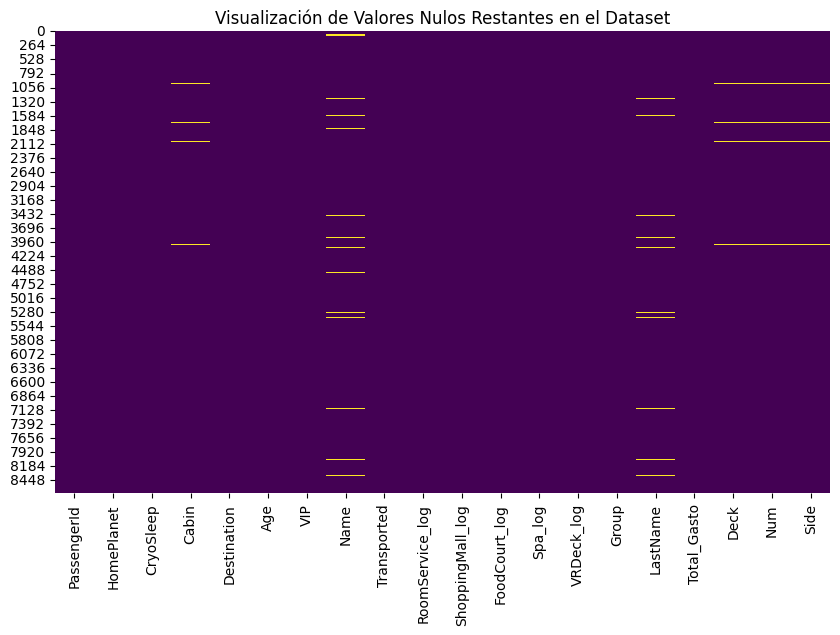

In [2553]:

# Crear un gráfico de calor (heatmap) para visualizar los valores nulos restantes en el DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df_modified.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Nulos Restantes en el Dataset')
plt.show()

In [2554]:
# Contar los nulos por variable.
print(f"\n{Fore.CYAN}Valores nulos por columna:\n{Fore.RESET}")
df_modified.isnull().sum()  # Suma los valores nulos por columna


Valores nulos por columna:



PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                99
Destination           0
Age                   0
VIP                   0
Name                200
Transported           0
RoomService_log       0
ShoppingMall_log      0
FoodCourt_log         0
Spa_log               0
VRDeck_log            0
Group                 0
LastName            104
Total_Gasto           0
Deck                 99
Num                  99
Side                 99
dtype: int64

In [2555]:
df_modified = df_modified.sort_values(['Deck','Group'])

In [2556]:
# Crear una tabla de contingencia para Deck y Transported
contingency_table = pd.crosstab(df_modified['Deck'], df_modified['Transported'], normalize='index')
print(contingency_table)

from scipy.stats import chi2_contingency

# Realizar el test de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_modified['Deck'], df_modified['Transported']))

# Mostrar el valor de p para ver si la relación es significativa
print(f"Valor de p: {p}")


Transported     False     True 
Deck                           
A            0.496183  0.503817
B            0.267588  0.732412
C            0.319317  0.680683
D            0.566735  0.433265
E            0.639548  0.360452
F            0.560498  0.439502
G            0.484158  0.515842
T            0.800000  0.200000
Valor de p: 4.8065762974340785e-81


El valor de p es un número extremadamente pequeño. Esto significa que la probabilidad de que la relación observada entre Deck y Transported sea debida al azar es casi inexistente.

**Interpretación:**
p = 6.349575583001859e-78 es mucho menor que el umbral común de 0.05. Esto significa que hay una relación estadísticamente significativa entre la cubierta (Deck) en la que viaja un pasajero y si fue transportado (Transported) o no.

Dado que este valor es tan pequeño, puedes concluir con mucha confianza que la cubierta en la que viaja un pasajero tiene una relación importante con la probabilidad de que haya sido transportado a otra dimensión.

In [2557]:
def side_trans(df):    
    # Convertir 'Side' a valores numéricos
    df['Side_numeric'] = df['Side'].map({'P': 1, 'S': 0})  # Suponiendo 'P' = 1, 'S' = 0

    # Verificar si la columna 'Transported' está en formato adecuado (True/False)
    df['Transported_numeric'] = df['Transported'].map({True: 1, False: 0})

    # Calcular la correlación entre 'Side_numeric' y 'Transported_numeric'
    correlation_side_transportation = df['Side_numeric'].corr(df['Transported_numeric'])

    print(correlation_side_transportation)

side_trans(df_modified)

# Eliminar la columna 'Side'
df_modified = df_modified.drop(columns=['Side','Side_numeric'])

-0.10371095326790827


In [2558]:
def num_trans(df):    
    # Convertir 'Num' a valores numéricos enteros
    df['Num'] = pd.to_numeric(df['Num'], errors='coerce')  # Convertir a numérico, manejando nulos

    # Verificar si la columna 'Transported' está en formato adecuado (True/False)
    df['Transported_numeric'] = df['Transported'].map({True: 1, False: 0})

    # Calcular la correlación entre 'Num' y 'Transported_numeric'
    correlation_num_transportation = df['Num'].corr(df['Transported_numeric'])

    # Imprimir la correlación
    print(f"Correlación entre 'Num' y 'Transported': {correlation_num_transportation}")

# Ejecutar la función con el DataFrame modificado
num_trans(df_modified)

# Eliminar la columna 'Num'
df_modified = df_modified.drop(columns=['Num','Transported_numeric'])




Correlación entre 'Num' y 'Transported': -0.04680473598349321


No parece haber una correlación fuerte entre el número de cabina (Num) y el transporte (Transported), lo que sugiere que el número de cabina no es un factor determinante para este resultado.
Decidimos tambien eliminar esta columna.

### Seguimos eliminando nulos de Cabin con KNN

In [2559]:
# Contar los nulos por variable.
print(f"\n{Fore.CYAN}Valores nulos por columna:\n{Fore.RESET}")
df_modified.isnull().sum()  # Suma los valores nulos por columna


Valores nulos por columna:



PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                99
Destination           0
Age                   0
VIP                   0
Name                200
Transported           0
RoomService_log       0
ShoppingMall_log      0
FoodCourt_log         0
Spa_log               0
VRDeck_log            0
Group                 0
LastName            104
Total_Gasto           0
Deck                 99
dtype: int64

In [2560]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2561]:
def imputar_cabin_con_knn(df, n_neighbors=450):
    """
    Imputa los valores nulos en la columna 'Cabin' de un DataFrame utilizando KNN y 
    maneja los valores de 'Cabin' de manera especial sin interferir con la columna 'Deck' existente.
    
    Parámetros:
    df: DataFrame - El DataFrame que contiene los datos.
    n_neighbors: int - Número de vecinos a considerar en el imputador KNN.
    
    Retorna:
    DataFrame - El DataFrame con los valores de 'Cabin' imputados y sin columnas temporales adicionales.
    """
    
    # Dividir la columna 'Cabin' en tres partes: 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'
    cabin_split = df['Cabin'].str.split('/', expand=True)
    df['Cabin_Deck'] = cabin_split[0]
    df['Cabin_Num'] = pd.to_numeric(cabin_split[1], errors='coerce')  # Convertir 'Num' a numérico
    df['Cabin_Side'] = cabin_split[2]

    # Crear una copia del dataframe para la imputación
    df_for_imputation = df.copy()

    # Eliminar Cabin_Deck y renombrar Deck a Cabin_Deck
    if 'Cabin_Deck' in df_for_imputation.columns:
        df_for_imputation.drop(columns=['Cabin_Deck'], inplace=True)
    
    # Renombrar la columna 'Deck' como 'Cabin_Deck' 
    if 'Deck' in df_for_imputation.columns:
        df_for_imputation.rename(columns={'Deck': 'Cabin_Deck'}, inplace=True)

    # Label encoding para las partes de 'Cabin' que no son numéricas ('Cabin_Deck' y 'Cabin_Side')
    label_encoders = {}
    for column in ['Cabin_Deck', 'Cabin_Side']:
        le = LabelEncoder()
        df_for_imputation[column] = df_for_imputation[column].astype(str)
        df_for_imputation[column] = le.fit_transform(df_for_imputation[column])
        label_encoders[column] = le

    # Aplicamos KNNImputer para imputar las columnas numéricas ('Cabin_Num') y categóricas ('Cabin_Deck' y 'Cabin_Side')
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Imputar para las columnas que tienen valores faltantes ('Cabin_Num', 'Cabin_Deck', 'Cabin_Side')
    df_for_imputation[['Cabin_Num', 'Cabin_Deck', 'Cabin_Side']] = imputer.fit_transform(df_for_imputation[['Cabin_Num', 'Cabin_Deck', 'Cabin_Side']])

    # Revertimos el Label Encoding de 'Cabin_Deck' y 'Cabin_Side'
    for column in ['Cabin_Deck', 'Cabin_Side']:
        df_for_imputation[column] = label_encoders[column].inverse_transform(df_for_imputation[column].astype(int))

    # Aseguramos que 'Cabin_Num' sea un entero
    df_for_imputation['Cabin_Num'] = df_for_imputation['Cabin_Num'].round().astype(int)

    # Restaurar la columna 'Cabin' al formato original 'Cabin_Deck/Cabin_Num/Cabin_Side'
    df_for_imputation['Cabin'] = df_for_imputation['Cabin_Deck'] + '/' + df_for_imputation['Cabin_Num'].astype(str) + '/' + df_for_imputation['Cabin_Side']


    # Eliminar las columnas temporales 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'
    df_for_imputation.drop(columns=['Cabin_Deck', 'Cabin_Num', 'Cabin_Side'], inplace=True)

    # Eliminar las columnas adicionales 'Deck', 'Num', 'Side' que quedaron en el DataFrame original si existen
    df_for_imputation = df_for_imputation.drop(columns=['Deck', 'Num', 'Side'], errors='ignore')

    # Devolver el DataFrame final sin nulos en 'Cabin'
    return df_for_imputation


In [2562]:
df_modified = imputar_cabin_con_knn(df_modified)

# Verificar si aún hay nulos en el DataFrame imputado
print(f"\n{Fore.CYAN}Verificar si aún hay nulos en el DataFrame imputado:{Fore.RESET}")
df_modified.isnull().sum()


Verificar si aún hay nulos en el DataFrame imputado:


PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
Name                200
Transported           0
RoomService_log       0
ShoppingMall_log      0
FoodCourt_log         0
Spa_log               0
VRDeck_log            0
Group                 0
LastName            104
Total_Gasto           0
dtype: int64

In [2563]:
df_modified = df_modified.drop(columns=['Name','Group','Total_Gasto'])

Eliminamos Name y nos quedamos con LastName que es el que aporta información

Eliminamos Group porque ya no nos sirve y nos quedamos con PassengerId

Eliminamos Deck que ya no es necesario y nos quedamos con Cabin

Eliminamos Total gasto porque ya no nos hace falta

In [2564]:
# Identificar columnas con un solo valor único
constant_columns = [col for col in df_modified.columns if df_modified[col].nunique() == 1]
print(f"\n{Fore.CYAN}Columnas que tienen un único valor en todas sus filas:\n{Fore.RESET}")
print(constant_columns)

# Opcional: Si necesitas que ocurra algo si no hay columnas constantes, puedes poner el bloque del if
if constant_columns == []:
    print("No hay columnas con valores constantes.")

# Hacemos una copia del dataset
df_dropped = df_modified.copy()

# Eliminar las columnas que tienen un único valor en todas sus filas
df_dropped = df_dropped.drop(columns=constant_columns)

# Verificar las columnas restantes
print(f"\n{Fore.CYAN}Verificamos las columnas restantes:\n{Fore.RESET}")
print(df_dropped.columns)



Columnas que tienen un único valor en todas sus filas:

[]
No hay columnas con valores constantes.

Verificamos las columnas restantes:

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'Transported', 'RoomService_log', 'ShoppingMall_log',
       'FoodCourt_log', 'Spa_log', 'VRDeck_log', 'LastName'],
      dtype='object')


In [2565]:
import random
import string

def imputar_lastname_con_letras(df):
    # Paso 1: Filtrar los valores nulos en LastName
    mask_null_lastname = df['LastName'].isnull()
    num_nulos = mask_null_lastname.sum()  # Contar cuántos valores nulos hay

    # Paso 2: Generar combinaciones únicas de letras aleatorias
    letras_usadas = set(df['LastName'].dropna())  # Asegurar que no se repiten con los existentes
    nuevos_lastnames = set()

    # Generar nuevas combinaciones de 3 letras aleatorias hasta tener suficientes nombres únicos
    while len(nuevos_lastnames) < num_nulos:
        new_lastname = 'Lastname'.join(random.choices(string.ascii_uppercase, k=3))
        if new_lastname not in letras_usadas and new_lastname not in nuevos_lastnames:
            nuevos_lastnames.add(new_lastname)

    # Paso 3: Convertir a lista para asignar
    nuevos_lastnames = list(nuevos_lastnames)

    # Imputar los valores nulos con las nuevas combinaciones generadas
    df.loc[mask_null_lastname, 'LastName'] = nuevos_lastnames

    print(f"Se han imputado {len(nuevos_lastnames)} valores únicos en la columna LastName.")
    return df

# Aplicar la función de imputación
df_modified = imputar_lastname_con_letras(df_modified)

# Verificar que no queden valores nulos
print(f"Valores nulos en LastName después de la imputación: {df_modified['LastName'].isnull().sum()}")


Se han imputado 104 valores únicos en la columna LastName.
Valores nulos en LastName después de la imputación: 0


In [2566]:
# Contar los nulos por variable.
print(f"\n{Fore.CYAN}Valores nulos por columna:\n{Fore.RESET}")
df_modified.isnull().sum()  # Suma los valores nulos por columna


Valores nulos por columna:



PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
Transported         0
RoomService_log     0
ShoppingMall_log    0
FoodCourt_log       0
Spa_log             0
VRDeck_log          0
LastName            0
dtype: int64

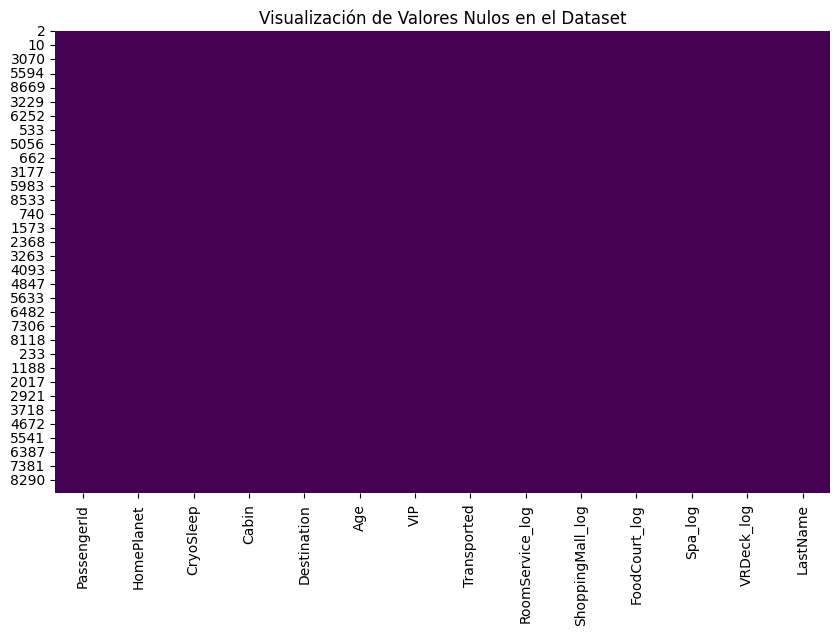

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2567]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un heatmap para mostrar los valores nulos
sns.heatmap(df_modified.isnull(), cbar=False, cmap='viridis')

# Título del gráfico
plt.title('Visualización de Valores Nulos en el Dataset')

# Mostrar el gráfico
plt.show()


# Guardar el heatmap y limpiar la figura
save_and_clear_plot("heatmap_valores_nulos.png")

In [2568]:
# Renombramos las columnas
df = df_modified.rename(columns={
    # 'Deck': 'Cabin',
    'RoomService_log': 'RoomService',
    'ShoppingMall_log': 'ShoppingMall',
    'FoodCourt_log': 'FoodCourt',
    'Spa_log': 'Spa',
    'VRDeck_log': 'VRDeck',
    'LastName': 'Name'
})

# Luego reordenamos las columnas en el orden original
new_order = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 
             'RoomService', 'ShoppingMall', 'FoodCourt', 'Spa', 'VRDeck', 'Name', 'Transported']

df = df[new_order]

# Mostrar las primeras filas del DataFrame
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,ShoppingMall,FoodCourt,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,0.395423,0.000000,0.794185,0.879710,0.387660,Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.000000,0.588099,0.694741,0.809679,0.522016,Susent,False
52,0056_01,Europa,False,A/1/S,TRAPPIST-1e,0.025316,False,0.000000,0.000000,0.000000,0.000000,0.000000,Tractive,True
53,0056_02,Europa,True,A/1/S,TRAPPIST-1e,0.481013,False,0.000000,0.000000,0.000000,0.000000,0.000000,Tractive,True
54,0056_03,Europa,False,A/1/S,TRAPPIST-1e,0.341772,False,0.588799,0.807212,0.621862,0.564975,0.137374,Tractive,True


In [2569]:
# Guardar el dataset modificado en un archivo CSV
df.to_csv('../data/df_model_train.csv', index=False)

# Verificar que el archivo se ha guardado correctamente
print("El dataset ha sido guardado como 'df_model_train.csv'.")

El dataset ha sido guardado como 'df_model_train.csv'.


In [2570]:
df.shape

(8693, 14)